In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [2]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt


In [3]:
df=pd.read_excel("adobe_dataset_cleaned_train.xlsx")

In [4]:
df.head()

,date,likes,content,username,media,inferred company,cleaned_hashtags,media_type
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,TimHortonsPH,Photo
1,2018-06-30 10:04:20,2750,Watch rapper freestyle for over an HOUR,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,no_tags,Photo
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,no_tags,Photo
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,no_tags,Photo
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of ! She was...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,excellenceisworththeeffort,Photo


In [5]:
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dheemankumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheemankumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Tokenization
df['tokenized_content'] = df['content'].apply(word_tokenize)


In [7]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_content'] = df['tokenized_content'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])


In [8]:
# Stemming
stemmer = PorterStemmer()
df['stemmed_content'] = df['filtered_content'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


In [9]:
# Join tokens back into sentences
df['processed_content'] = df['stemmed_content'].apply(lambda tokens: ' '.join(tokens))


In [10]:
# Generate word cloud
all_text = ' '.join(df['processed_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


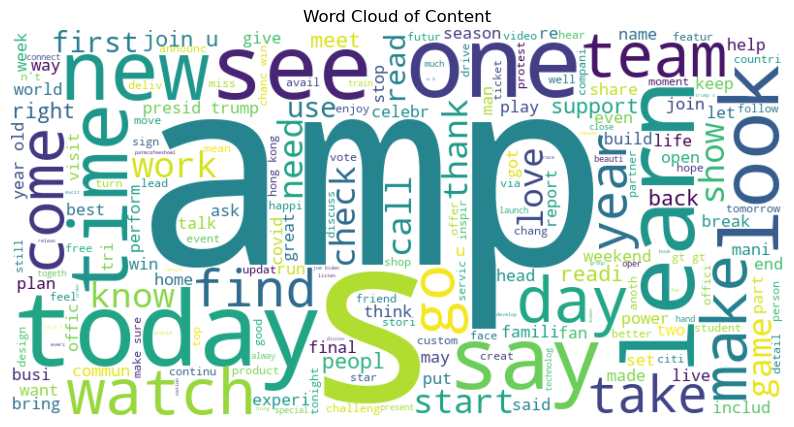

In [11]:
# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Content')
plt.axis('off')
plt.show()
